# Seasonal Affective Disorder Analysis through Reddit
For my final project, I want to analyze mental health trends and how they change throughout the year. I looked at post count and post sentiments in the subreddits "mental health" and "depression" to see variations across months and years. This can help us understand at which points seasonally people are most vulnerable to mental health crises. It could work to identify particular risk factors and assist in prevention. In this project, I am interested in investigating two questions; How does mental health change through each month, and what are the variations between the mental health and depression subreddits?

## Data Collection

In [ ]:
pip install praw #Python Reddit API wrapper

First, I need to initialize the Reddit API and load the data from the subreddits.

In [ ]:
#Importing necessary libraries.
import praw
# Initializing Reddit with credentials.
reddit = praw.Reddit(
    client_id='qdkQmZ2Z7_xEZ50UF7ZuOA',
    client_secret='g3qibphG9iPvfgpwT3WCjI2fjR_Y4A',
    user_agent='sryan2502'
)

In [ ]:
#Importing necessary libraries.
import pandas as pd
from datetime import datetime

#Defining the subreddit of interest, r/mentalhealth
subreddit_mh = reddit.subreddit("mentalhealth")
posts_data_mh = [] #Empty list

#Adding data from 1000 submissions to list
for submission in subreddit_mh.top(time_filter="all", limit=1000):
    posts_data_mh.append({
        "title": submission.title,
        "created_utc": submission.created_utc
    })

#Defining second subreddit of interest, r/depression
subreddit_dep = reddit.subreddit("depression")
posts_data_dep = [] #Empty list

#Adding data from 1000 submissions to list
for submission in subreddit_dep.top(time_filter="all", limit=1000):
    posts_data_dep.append({
        "title": submission.title,
        "created_utc": submission.created_utc
    })

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

## Data Wrangling / Cleaning

Next, I created dataframes from the post data and found the month and year of each post. This will allow us to see how posts are different over months and years.

In [ ]:
#Creating dataframes of posts and converting to datetime.

#Mental health DF, denoted "mh"
df_mh = pd.DataFrame(posts_data_mh)

df_mh['date'] = pd.to_datetime(df_mh['created_utc'], unit='s')

df_mh['year'] = df_mh['date'].dt.year
df_mh['month'] = df_mh['date'].dt.month

#Depression DF, denoted "dep"
df_dep = pd.DataFrame(posts_data_dep)

df_dep['date'] = pd.to_datetime(df_dep['created_utc'], unit='s')

df_dep['year'] = df_dep['date'].dt.year
df_dep['month'] = df_dep['date'].dt.month

### Dataframes

#### Mental Health df

In [ ]:
df_mh #Viewing the dataframe

,title,created_utc,date,year,month
0,Mental Health Awareness Month: I have schizoaf...,1.527536e+09,2018-05-28 19:31:47,2018,5
1,"Not to brag, but instead of laying in bed ALL ...",1.555356e+09,2019-04-15 19:13:30,2019,4
2,Thank you to the woman who rang me out at Targ...,1.636775e+09,2021-11-13 03:49:11,2021,11
3,PREACH,1.500733e+09,2017-07-22 14:10:42,2017,7
4,It’s been 2 months to the day since I last sel...,1.571556e+09,2019-10-20 07:12:42,2019,10
...,...,...,...,...,...
988,My childhood crush passed away in the age of 1...,1.721201e+09,2024-07-17 07:17:15,2024,7
989,What stopped you from ending your life?,1.728903e+09,2024-10-14 10:46:07,2024,10
990,"Is it acceptable to disengage, mute all politi...",1.730890e+09,2024-11-06 10:51:57,2024,11
991,"If you could have 5 little ""Mental Health"" rem...",1.718828e+09,2024-06-19 20:18:06,2024,6


#### Depression df

In [ ]:
df_dep #Viewing the dataframe

,title,created_utc,date,year,month
0,Shout out to the particular hell that is funct...,1.563091e+09,2019-07-14 07:53:40,2019,7
1,I hate that people don’t understand that i don...,1.596506e+09,2020-08-04 01:57:38,2020,8
2,If 10 years ago someone told me that in 10 yea...,1.562939e+09,2019-07-12 13:36:38,2019,7
3,"It’s like I died at 15, but my body just kept ...",1.588081e+09,2020-04-28 13:40:28,2020,4
4,High-functioning depression: I feel like I'm l...,1.572515e+09,2019-10-31 09:36:19,2019,10
...,...,...,...,...,...
965,Being human is torture for me,1.732732e+09,2024-11-27 18:23:09,2024,11
966,When you’re truly depressed..,1.711751e+09,2024-03-29 22:25:28,2024,3
967,I’m fucking disgusting,1.708527e+09,2024-02-21 14:54:14,2024,2
968,I'm losing it,1.705774e+09,2024-01-20 18:10:36,2024,1


These dataframes give the title, exact date-time, year, and month of each post in the subreddits. The posts span the past approximately the past 7 years, from 2017-2024 for mental health data and 2018-2024 for depression data. The mental health data contains 993 observations, and the depression data contains 970 observations.

### Post Counts

In [ ]:
#Monthly post count in each subreddit using groupby() and size()
monthly_counts_mh = df_mh.groupby('month').size()
print(monthly_counts_mh)

monthly_counts_dep = df_dep.groupby('month').size()
print(monthly_counts_dep)

month
1      81
2      73
3      97
4     101
5      94
6      72
7      76
8      69
9      67
10     78
11    102
12     83
dtype: int64
month
1     74
2     74
3     75
4     99
5     86
6     88
7     77
8     88
9     81
10    74
11    88
12    66
dtype: int64


Looking at the amount of posts in each month can give us a preliminary idea of which months most people are posting in. For the mental health subreddit, we can immediately see that there is an increase in posts during April and November. The depression data is slightly more evenly spread, however the highest is still in April, followed by November, May, and August. Further investigation in this project can tell us more about why these months may be important.

Next, I group the post counts by both month and year, where each column is a year and each row is the month.

In [ ]:
#Grouping the data in a new dataframe by year and month.
posts_per_month_mh = df_mh.groupby(['year', 'month']).size().reset_index(name='post_count')

posts_per_month_dep = df_dep.groupby(['year', 'month']).size().reset_index(name='post_count')

In [ ]:
#Pivoting the data so each column is the year, and each row is the month.
pivot_data_mh = posts_per_month_mh.pivot(index='month', columns='year', values='post_count')

pivot_data_dep = posts_per_month_dep.pivot(index='month', columns='year', values='post_count')

#Dropping NA values.
pivot_data_mh = pivot_data_mh.dropna(axis=1, how='any')
pivot_data_dep = pivot_data_dep.dropna(axis=1, how='any')

#Viewing the pivoted data.
print(pivot_data_mh)
print(pivot_data_dep)


year   2018  2019  2020  2021  2022  2024
month                                    
1       2.0   8.0  17.0  34.0  13.0   2.0
2       4.0  17.0  14.0  26.0   8.0   3.0
3       4.0  20.0  25.0  29.0  10.0   5.0
4      10.0  19.0  26.0  27.0   7.0   5.0
5      10.0  14.0  26.0  26.0   5.0   9.0
6       3.0  16.0  21.0  15.0   9.0   5.0
7       2.0  12.0  30.0  17.0   7.0   5.0
8       1.0  16.0  27.0   8.0   4.0   4.0
9       1.0  17.0  26.0   4.0   8.0   3.0
10      8.0  17.0  24.0  11.0   7.0   1.0
11      8.0  21.0  39.0  13.0   6.0   4.0
12      8.0  19.0  27.0  17.0   5.0   1.0
year   2017  2018  2019  2020  2021  2022
month                                    
1       5.0   5.0   5.0  15.0  29.0   9.0
2       5.0  10.0   3.0  21.0  22.0   6.0
3       2.0   8.0  13.0  20.0  19.0   6.0
4       5.0   8.0  21.0  26.0  26.0   3.0
5       3.0   3.0  25.0  24.0  19.0   7.0
6       2.0   7.0  27.0  23.0  16.0   5.0
7       5.0  10.0  19.0  25.0  11.0   4.0
8       2.0   6.0  36.0  24.0  10.

This new dataframe can give us an idea of the post distribution per month, throughout the years as well. I've created a heatmap for easier viewing.

## Data Visualization

### Heatmap of post counts

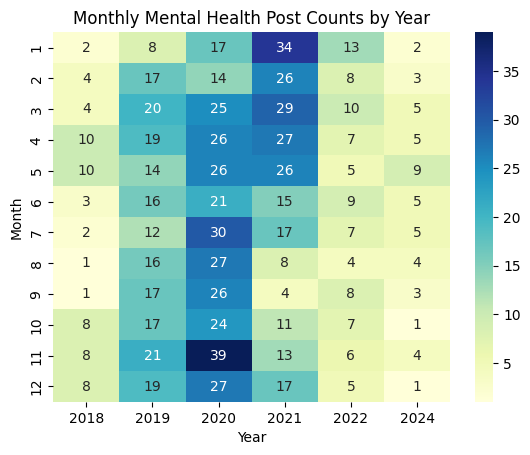

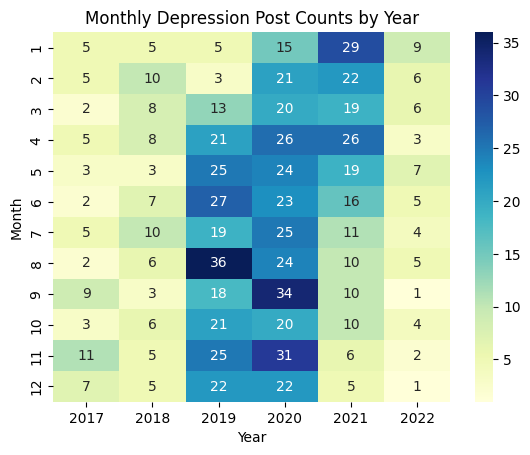

In [ ]:
#Importing necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

#Heatmaps using seaborn of post counts each month of each year.
sns.heatmap(pivot_data_mh, annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Monthly Mental Health Post Counts by Year')
plt.show()

sns.heatmap(pivot_data_dep, annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Monthly Depression Post Counts by Year')
plt.show()


These heatmaps can provide interesting insight, particularly in how each year has been different. In both plots it's clear that there was a huge increase in posts from 2019-2021. 2020 and 2021 posts could likely be attributed to Covid-19, a known period of mental health struggles for people across the world. I'd be interested to learn more about why this trend seemed to start in 2019, before the pandemic was prevalent.

There are some patterns from month to month that can be unpacked here. Once again, April seems to be getting a lot of heat, as viewed in the original glimpse of the distribution. Additionally, November shows higher counts, as we saw in the preliminary look at the data. The highest number of posts occur in November of 2020 for mental health, and August of 2019 for depression. This reveals some differences in the subreddits.

### Plot of average post counts

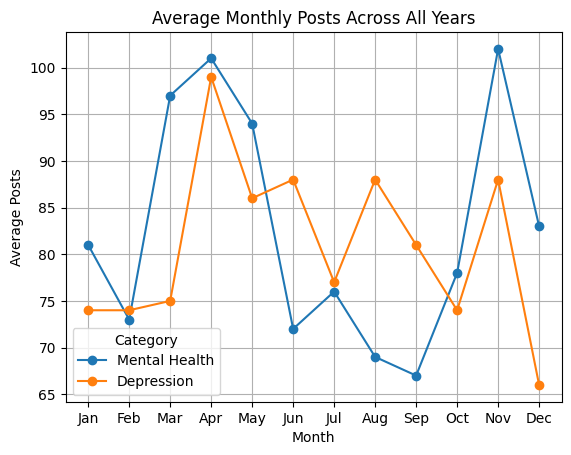

In [ ]:
import matplotlib.pyplot as plt

#Grouping posts by month for mental health.
avg_posts_by_month_mh = df_mh.groupby('month').size().reset_index(name='avg_post_count')

# Plot Mental Health posts
plt.plot(
    avg_posts_by_month_mh['month'],
    avg_posts_by_month_mh['avg_post_count'],
    label='Mental Health',
    marker='o'
)

#Grouping posts by month for depression.
avg_posts_by_month_dep = df_dep.groupby('month').size().reset_index(name='avg_post_count')

# Plot Depression posts
plt.plot(
    avg_posts_by_month_dep['month'],
    avg_posts_by_month_dep['avg_post_count'],
    label='Depression',
    marker='o'
)

# Add labels, title, and legend
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Average Posts')
plt.title('Average Monthly Posts Across All Years')
plt.legend(title="Category")  # Add a legend to differentiate lines
plt.grid()
plt.show()


This plot looks at the data in a different way to help us see general trends of posts over months, not per year. This provides a sense of averages over a period of multiple years. April once again is clearly the highest point for both plots. In general, both plots show lower post counts from December to February, and June to September. The depression data does show a jump in August that is not seen in the mental health data. In general, the mental health data shows more severe highs and lows.

Trends in post counts gave me a clue about months of interest. Now, I will perform sentiment analysis to get a better idea of the content of these posts. This can show if the increase and decrease in counts is attributed to negative or positive posts.

## Data Analysis

In [ ]:
#Importing necessary libraries
from textblob import TextBlob
import pandas as pd

### TextBlob polarity sentiment analysis

For my first sentiment analysis, I used TextBlob, a library that performs NLP. It contains a predefined lexicon of words with an associated polarity score, and calculates the polarity of all words in the text. It then supplies a float value ranging from -1.0(negative sentiment) to 1.0(positive sentiment), with 0.0 being neutral.

In [ ]:
#Creating function to calculate sentiment score using TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

#Applying the function to the title of each post for mental health and depression.
df_mh['sentiment'] = df_mh['title'].apply(get_sentiment)
df_dep['sentiment'] = df_dep['title'].apply(get_sentiment)

In [ ]:
#Creating function to calculate sentiment polarity.
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

#Applying the function to the newly created sentiment column in the dataframe.
df_mh['sentiment_category'] = df_mh['sentiment'].apply(categorize_sentiment)
df_dep['sentiment_category'] = df_dep['sentiment'].apply(categorize_sentiment)

Sentiment scores and polarity can give a glimpse as to whether the posts are generally positive, negative, or neutral.

In [ ]:
df_mh #Viewing the dataframe

,title,created_utc,date,year,month,sentiment,sentiment_category
0,Mental Health Awareness Month: I have schizoaf...,1.527536e+09,2018-05-28 19:31:47,2018,5,0.160000,Positive
1,"Not to brag, but instead of laying in bed ALL ...",1.555356e+09,2019-04-15 19:13:30,2019,4,0.250000,Positive
2,Thank you to the woman who rang me out at Targ...,1.636775e+09,2021-11-13 03:49:11,2021,11,0.000000,Neutral
3,PREACH,1.500733e+09,2017-07-22 14:10:42,2017,7,0.000000,Neutral
4,It’s been 2 months to the day since I last sel...,1.571556e+09,2019-10-20 07:12:42,2019,10,0.400000,Positive
...,...,...,...,...,...,...,...
988,My childhood crush passed away in the age of 1...,1.721201e+09,2024-07-17 07:17:15,2024,7,0.000000,Neutral
989,What stopped you from ending your life?,1.728903e+09,2024-10-14 10:46:07,2024,10,0.000000,Neutral
990,"Is it acceptable to disengage, mute all politi...",1.730890e+09,2024-11-06 10:51:57,2024,11,0.025000,Positive
991,"If you could have 5 little ""Mental Health"" rem...",1.718828e+09,2024-06-19 20:18:06,2024,6,-0.143750,Negative


In [ ]:
df_dep #Viewing the dataframe

,title,created_utc,date,year,month,sentiment,sentiment_category
0,Shout out to the particular hell that is funct...,1.563091e+09,2019-07-14 07:53:40,2019,7,0.166667,Positive
1,I hate that people don’t understand that i don...,1.596506e+09,2020-08-04 01:57:38,2020,8,-0.350000,Negative
2,If 10 years ago someone told me that in 10 yea...,1.562939e+09,2019-07-12 13:36:38,2019,7,0.325000,Positive
3,"It’s like I died at 15, but my body just kept ...",1.588081e+09,2020-04-28 13:40:28,2020,4,0.000000,Neutral
4,High-functioning depression: I feel like I'm l...,1.572515e+09,2019-10-31 09:36:19,2019,10,0.000000,Neutral
...,...,...,...,...,...,...,...
965,Being human is torture for me,1.732732e+09,2024-11-27 18:23:09,2024,11,0.000000,Neutral
966,When you’re truly depressed..,1.711751e+09,2024-03-29 22:25:28,2024,3,0.000000,Neutral
967,I’m fucking disgusting,1.708527e+09,2024-02-21 14:54:14,2024,2,-1.000000,Negative
968,I'm losing it,1.705774e+09,2024-01-20 18:10:36,2024,1,0.000000,Neutral


Intuitively looking at the sentiment scores provided by TextBlob, some appear to be not entirely accurate. It can provide a good general overview of positive or negative text, however I will perform further detailed text analysis in the next section to give a more in depth look at the sentiments.

In [ ]:
#Grouping the sentiments by month
sentiment_trends_mh = df_mh.groupby('month')['sentiment'].mean().reset_index()
print(sentiment_trends_mh)

sentiment_trends_dep = df_dep.groupby('month')['sentiment'].mean().reset_index()
print(sentiment_trends_dep)

    month  sentiment
0       1  -0.008044
1       2  -0.013152
2       3  -0.016304
3       4   0.060946
4       5   0.057726
5       6   0.014294
6       7   0.049480
7       8   0.062194
8       9  -0.005542
9      10   0.048275
10     11   0.025413
11     12   0.056832
    month  sentiment
0       1  -0.031905
1       2  -0.101784
2       3   0.029479
3       4  -0.060146
4       5  -0.083919
5       6  -0.090478
6       7  -0.082710
7       8  -0.085507
8       9  -0.032433
9      10  -0.136068
10     11  -0.031671
11     12  -0.059502


These dataframes show the mean sentiment score for each month. As to be expected, nearly every month in the depression subreddit has a negative average sentiment. The lowest mean is in October, and the highest in March. For mental health, The lowest is in March, and the highest is in August. I've provided a plot to show this data in a more readable way.

### Polarity plot

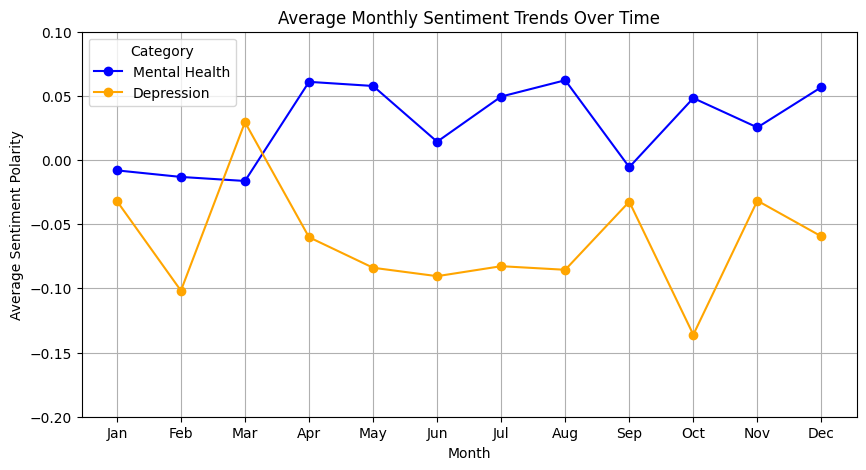

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for the combined plot
plt.figure(figsize=(10, 5))

# Plot Mental Health sentiment trends
plt.plot(
    sentiment_trends_mh['month'],
    sentiment_trends_mh['sentiment'],
    label='Mental Health',
    color='blue',
    marker='o'
)

# Plot Depression sentiment trends
plt.plot(
    sentiment_trends_dep['month'],
    sentiment_trends_dep['sentiment'],
    label='Depression',
    color='orange',
    marker='o'
)

# Set the same y-axis scale for both lines
plt.ylim(-0.2, 0.1)

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Average Sentiment Polarity')
plt.title('Average Monthly Sentiment Trends Over Time')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.legend(title="Category")  # Add a legend to differentiate lines
plt.show()


Viewing the average sentiments per month can provide some new insight about mental health over the seasons. This graph shows some disparities I will investigate more closely with huggingface text analysis next. The sentiment is generally more positive in April for the mental health subreddit, suggesting that the increase in posts during this month is not necessarily indicitave of a crisis. Interestingly, the sentiment in March reaches a high point in the depression subreddit, and a low point in the mental health subreddit. There are also opposite sentiment averages for the month of December. The depression data has its most negative sentiment in October, and most positive in March. The mental health data has its most negative sentiment in March, and most positive in August and April. As is to be expected, all almost all sentiment scores in the depression data are much lower than that of the mental health data.

This is why it is important to look at both subreddits. The change in sentiment of mental health data may be more valuable for interpretation. It makes sense that depression subreddit posts will be all negative, however the mental health reddit may consist of positive or negative posts about mood and wellbeing. When posts in this subreddit are particularly negative, it may provide more valuable information about general health.

This being said, it is worth noting the sharp decline in sentiment for depression posts in October. This could be due to the changing of the seasons, or SAD. Winter months tend to be difficult for those diagnosed with seasonal depression. October generally being the beginning of cold dark months could spike negative emotions.

### Hugging Face sentiment analysis

Next, I use a Hugging Face model for further text analysis. The model I chose classifies text into a whole array of emotions. There are 28 in total, including sadness, disappointment, curiosity, annoyance, grief, disapproval, fear, joy, etc. This analysis can give us a much more in depth look at sentiments, rather than just categorizing into positive, negative, or neutral.

In [ ]:
#Importing necessary libraries.
from transformers import pipeline

In [ ]:
#Filtering the data to a random sample of 100 for easier analysis, and then applying the model
filtered_df_mh = df_mh.sample(n = 100, random_state = 123)
titles_mh = filtered_df_mh['title'].tolist()
classifier_mh = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)
sentences_mh = titles_mh
model_outputs_mh = classifier_mh(sentences_mh)


filtered_df_dep = df_dep.sample(n = 100, random_state = 123)
titles_dep = filtered_df_dep['title'].tolist()
classifier_dep = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)
sentences_dep = titles_dep
model_outputs_dep = classifier_dep(sentences_dep)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
#Dropping NA values
df_dep = df_dep.dropna()

In [ ]:
#Creating dataframes that contain the title of the post, the classification based on the Hugging Face model, and the month of the post.
result_df_mh = pd.DataFrame({
    'title': titles_mh,
    'classification': model_outputs_mh,
    'month': df_mh['month'].sample(n = 100, random_state = 123)
}
)

result_df_dep = pd.DataFrame({
    'title': titles_dep,
    'classification': model_outputs_dep,
    'month': df_dep['month'].sample(n = 100, random_state = 123)
}
)

Because this model classifies into 28 emotions, I want to get only the top sentiment for each post. The classifier with the highest score gives the best fit sentiment for each post.

In [ ]:
#Creating a function to find the highest classifier.
def get_highest_classifier_mh(model_outputs_mh):
    # Find and return the entry with the maximum score
    highest = max(model_outputs_mh, key=lambda x: x['score'])
    return highest

#Applying the function to the classification column, creating a new dataframe with a highest classifier column.
result_df_mh['highest_classifier'] = result_df_mh['classification'].apply(get_highest_classifier_mh)

#New dataframe with selected columns.
new_df_mh = result_df_mh[['title', 'highest_classifier', 'month']].copy()

#Extracting label and score from highest classifier column.
new_df_mh['highest_label'] = new_df_mh['highest_classifier'].apply(lambda x: x['label'])
new_df_mh['highest_score'] = new_df_mh['highest_classifier'].apply(lambda x: x['score'])

#Viewing the new dataframe.
new_df_mh

,title,highest_classifier,month,highest_label,highest_score
746,Religion used to mess with my mental health SO...,"{'label': 'sadness', 'score': 0.4496569335460663}",4,sadness,0.449657
532,can a kid have mental health issues?,"{'label': 'curiosity', 'score': 0.672366917133...",8,curiosity,0.672367
548,Have anxiety -> go on meds -> no more anxiety ...,"{'label': 'nervousness', 'score': 0.3818337619...",8,nervousness,0.381834
352,New job! Still homeless but I got a new job! M...,"{'label': 'sadness', 'score': 0.3015739917755127}",6,sadness,0.301574
684,"I actually can't stand the saying ""Happiness i...","{'label': 'disapproval', 'score': 0.5333226919...",1,disapproval,0.533323
...,...,...,...,...,...
554,I fucking hate being told how “strong” I am be...,"{'label': 'anger', 'score': 0.720556914806366}",3,anger,0.720557
343,Sometimes I just want to drive off of the road...,"{'label': 'desire', 'score': 0.5269221067428589}",7,desire,0.526922
624,My high school bully is now a registered psych...,"{'label': 'neutral', 'score': 0.468065083026886}",5,neutral,0.468065
856,A close family member passed last year due to ...,"{'label': 'sadness', 'score': 0.38261276483535...",4,sadness,0.382613


In [ ]:
#Creating the function for the depression data
def get_highest_classifier_dep(model_outputs_dep):
    # Find the entry with the maximum score
    highest = max(model_outputs_dep, key=lambda x: x['score'])
    return highest

#Applying function to the classification column.
result_df_dep['highest_classifier'] = result_df_dep['classification'].apply(get_highest_classifier_dep)

#New dataframe with selected columns.
new_df_dep = result_df_dep[['title', 'highest_classifier', 'month']].copy()

# Drop rows with invalid values
new_df_dep = new_df_dep[new_df_dep['highest_classifier'].apply(lambda x: isinstance(x, dict))]

#Extracting highest label and score from classifier column.
new_df_dep['highest_label'] = new_df_dep['highest_classifier'].apply(lambda x: x['label'])
new_df_dep['highest_score'] = new_df_dep['highest_classifier'].apply(lambda x: x['score'])

#Viewing the new dataframe.
new_df_dep

,title,highest_classifier,month,highest_label,highest_score
171,"“People with depression don’t want to die, the...","{'label': 'neutral', 'score': 0.7877304553985596}",4,neutral,0.787730
799,Disassociating?,"{'label': 'neutral', 'score': 0.41173669695854...",9,neutral,0.411737
204,I hate waking up from a dream where I'm happy,"{'label': 'joy', 'score': 0.44400328397750854}",6,joy,0.444003
760,Had police called to flat yesterday,"{'label': 'neutral', 'score': 0.9501776099205017}",4,neutral,0.950178
335,90% of all my thoughts are the same self-hatin...,"{'label': 'annoyance', 'score': 0.594458699226...",9,annoyance,0.594459
...,...,...,...,...,...
894,Does anyone else procrastinate till the last m...,"{'label': 'curiosity', 'score': 0.477981716394...",3,curiosity,0.477982
553,Sometimes I want to kill myself out of spite,"{'label': 'neutral', 'score': 0.2534026503562927}",9,neutral,0.253403
896,lonely,"{'label': 'sadness', 'score': 0.8714418411254883}",12,sadness,0.871442
895,"I hate lying on bed all day, being unproductiv...","{'label': 'anger', 'score': 0.6713161468505859}",1,anger,0.671316


These new dataframes provide the title of the post, the month of the post, the highest classification score, and the label of the highest score. This is a much more detailed text analysis that can give a better understanding of the exact sentiments of each post and each month.

### Hugging Face charts and heatmaps

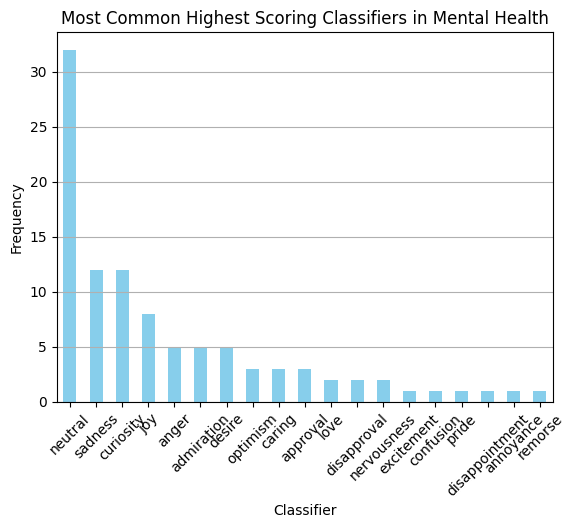

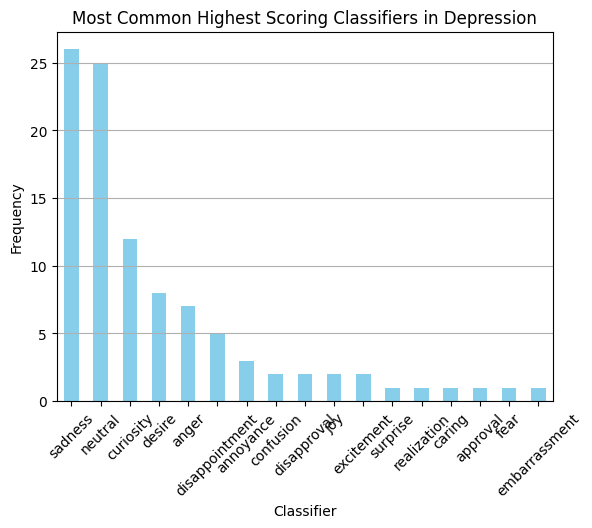

In [ ]:
#Finding the counts of each highest score label.
label_counts_mh = new_df_mh['highest_label'].value_counts()

# Bar chart for mental health
label_counts_mh.plot(kind='bar', color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Frequency')
plt.title('Most Common Highest Scoring Classifiers in Mental Health')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

label_counts_dep = new_df_dep['highest_label'].value_counts()

# Bar chart for depression
label_counts_dep.plot(kind='bar', color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Frequency')
plt.title('Most Common Highest Scoring Classifiers in Depression')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

These bar charts provide the count of each highest sentiment score for the posts. As to be expected, the depression data has the highest counts for sadness. It also includes more posts with sentiments like disappointment and annoyance. The mental health data has a highest count of neutral, followed by sadness, curiosity, and joy. The distribution of the mental health data looks to be slightly more spread than the depression data. This reveals the differences in the two subreddits and could explain some of the differences in post counts analyzed earlier in the project. A period with a lot of posts in the mental health subreddit and fewer in the depression subreddit could contain more positive ideas. Next, I look at how these sentiments are distributed over the months.

In [ ]:
# Group by year and month, then find the max sentiment score
highest_sentiment_per_month_mh = new_df_mh.groupby(['month'])['highest_label'].max().reset_index()

print(highest_sentiment_per_month_mh)

highest_sentiment_per_month_dep = new_df_dep.groupby(['month'])['highest_label'].max().reset_index()

print(highest_sentiment_per_month_dep)


    month highest_label
0       1       sadness
1       2       neutral
2       3       sadness
3       4       sadness
4       5      optimism
5       6       sadness
6       7       sadness
7       8       neutral
8       9       sadness
9      10       sadness
10     11       sadness
11     12       sadness
    month highest_label
0       1       sadness
1       2       neutral
2       3       sadness
3       4       sadness
4       5       sadness
5       6       sadness
6       7       sadness
7       8      surprise
8       9       sadness
9      10       sadness
10     11       sadness
11     12       sadness


These dataframes show the most common sentiment in each month. I've created a heatmap to view the results more clearly.

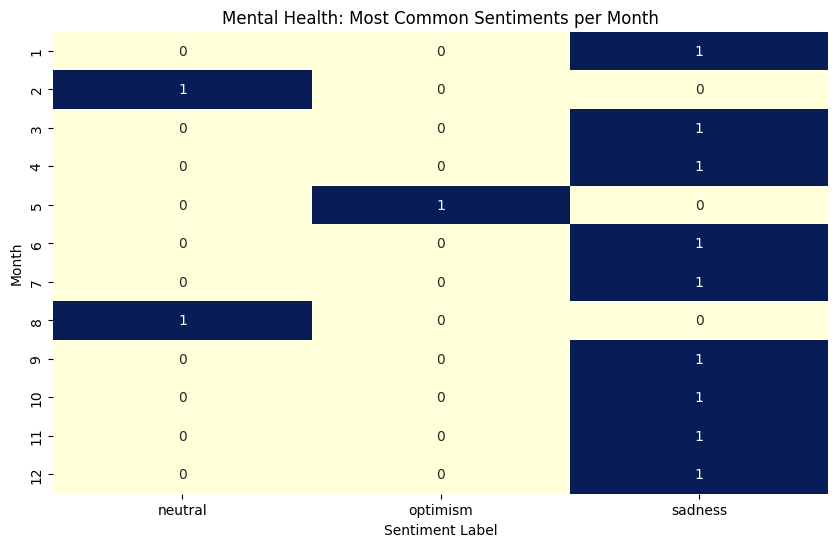

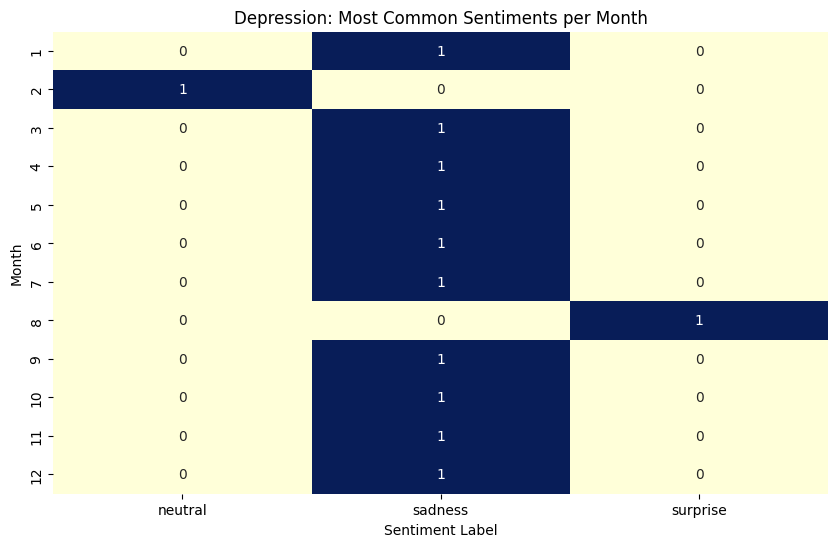

In [ ]:
#Heatmap of sentiments in each month.
import numpy as np

# Create dummy variables for the labels.
mh_pivot = highest_sentiment_per_month_mh.pivot(index='month', columns='highest_label', values='highest_label')
mh_pivot = mh_pivot.notnull().astype(int)

dep_pivot = highest_sentiment_per_month_dep.pivot(index='month', columns='highest_label', values='highest_label')
dep_pivot = dep_pivot.notnull().astype(int)

# Plot heatmaps.
plt.figure(figsize=(10, 6))
sns.heatmap(mh_pivot, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Mental Health: Most Common Sentiments per Month")
plt.xlabel("Sentiment Label")
plt.ylabel("Month")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(dep_pivot, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Depression: Most Common Sentiments per Month")
plt.xlabel("Sentiment Label")
plt.ylabel("Month")
plt.show()


Sadness is the top sentiment in the mental health subreddit for all months except May, August, and February. Looking back at post counts per month in this subreddit, there were peaks during March, April, and November. This reveals that these could be difficult months for people experiencing mental health struggles.

The depression subreddit shows sadness as the top sentiment for all months except February and August. November and April in particular showed a large peak in post count for the depression subreddit. This suggests that these months may be a difficult time for those with depression.

## Conclusion
This investigation of mental health variance through the seasons yielded interesting and surprising results. Seasonal Affective Disorder (SAD) is a significant change in mood and behavior caused by changing of the seasons. Reddit is a popular forum for discussions of mental health, and analyzing post count and post sentiments provides insight as to how mood may change over time. The two subreddits I looked at, r/mentalhealth and r/depression, did have some common patterns, however the mental health data showed a lot more variety in sentiment. Overall, the results somewhat confirmed what I previously thought about SAD. I expected winter months to reflect more mental health struggles. When taking into account both post count and sentiment, it appears that the months of March, April, and November may be the most difficult times for people. This actually does indicate difficulty with seasonal changes, as these months are the transition periods to spring and winter. This project was very eye opening to me and could open doors for further investigation of Seasonal Affective Disorder.